In [1]:
import radar_attenuation.gaia_util as gu
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
T0 = 110 # K
Tb = 272.976
scaleD = 21. # km
scaleC =  0 # kg/m3
scaleT = (Tb-T0)
R0 = 252100.0

In [3]:
caseID = 'ann2_129_RR0.9167_P0.08'
path_to_caseID = "../../figures/figure4/data/gaia_grainsize_simulations/grain_1e-4/"

return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e4 = return_list[0]
o_1e4 = return_list[1]

nShells = o_1e4.grid.nShells
nCellsPerShell = o_1e4.grid.nCellsPerShell[0]
gaia_temp_table_1e4 = gu.transform_T_to_table(s_1e4, o_1e4, caseID, T0, scaleT, scaleD, scaleC)
df_1e4, attenuation_1e4 = gu.calc_gaia_attenuation(gaia_temp_table_1e4, R0, nShells, nCellsPerShell, "low_loss", '1e-4')

Case: ann2_129_RR0.9167_P0.08 Loaded Grid: ann2_129_RR0.9167_P0.08.grid
Got 0 new files, 1 in total.
Loaded time 1.3987502210449598 and iteration 87600
cells per depth 748.0


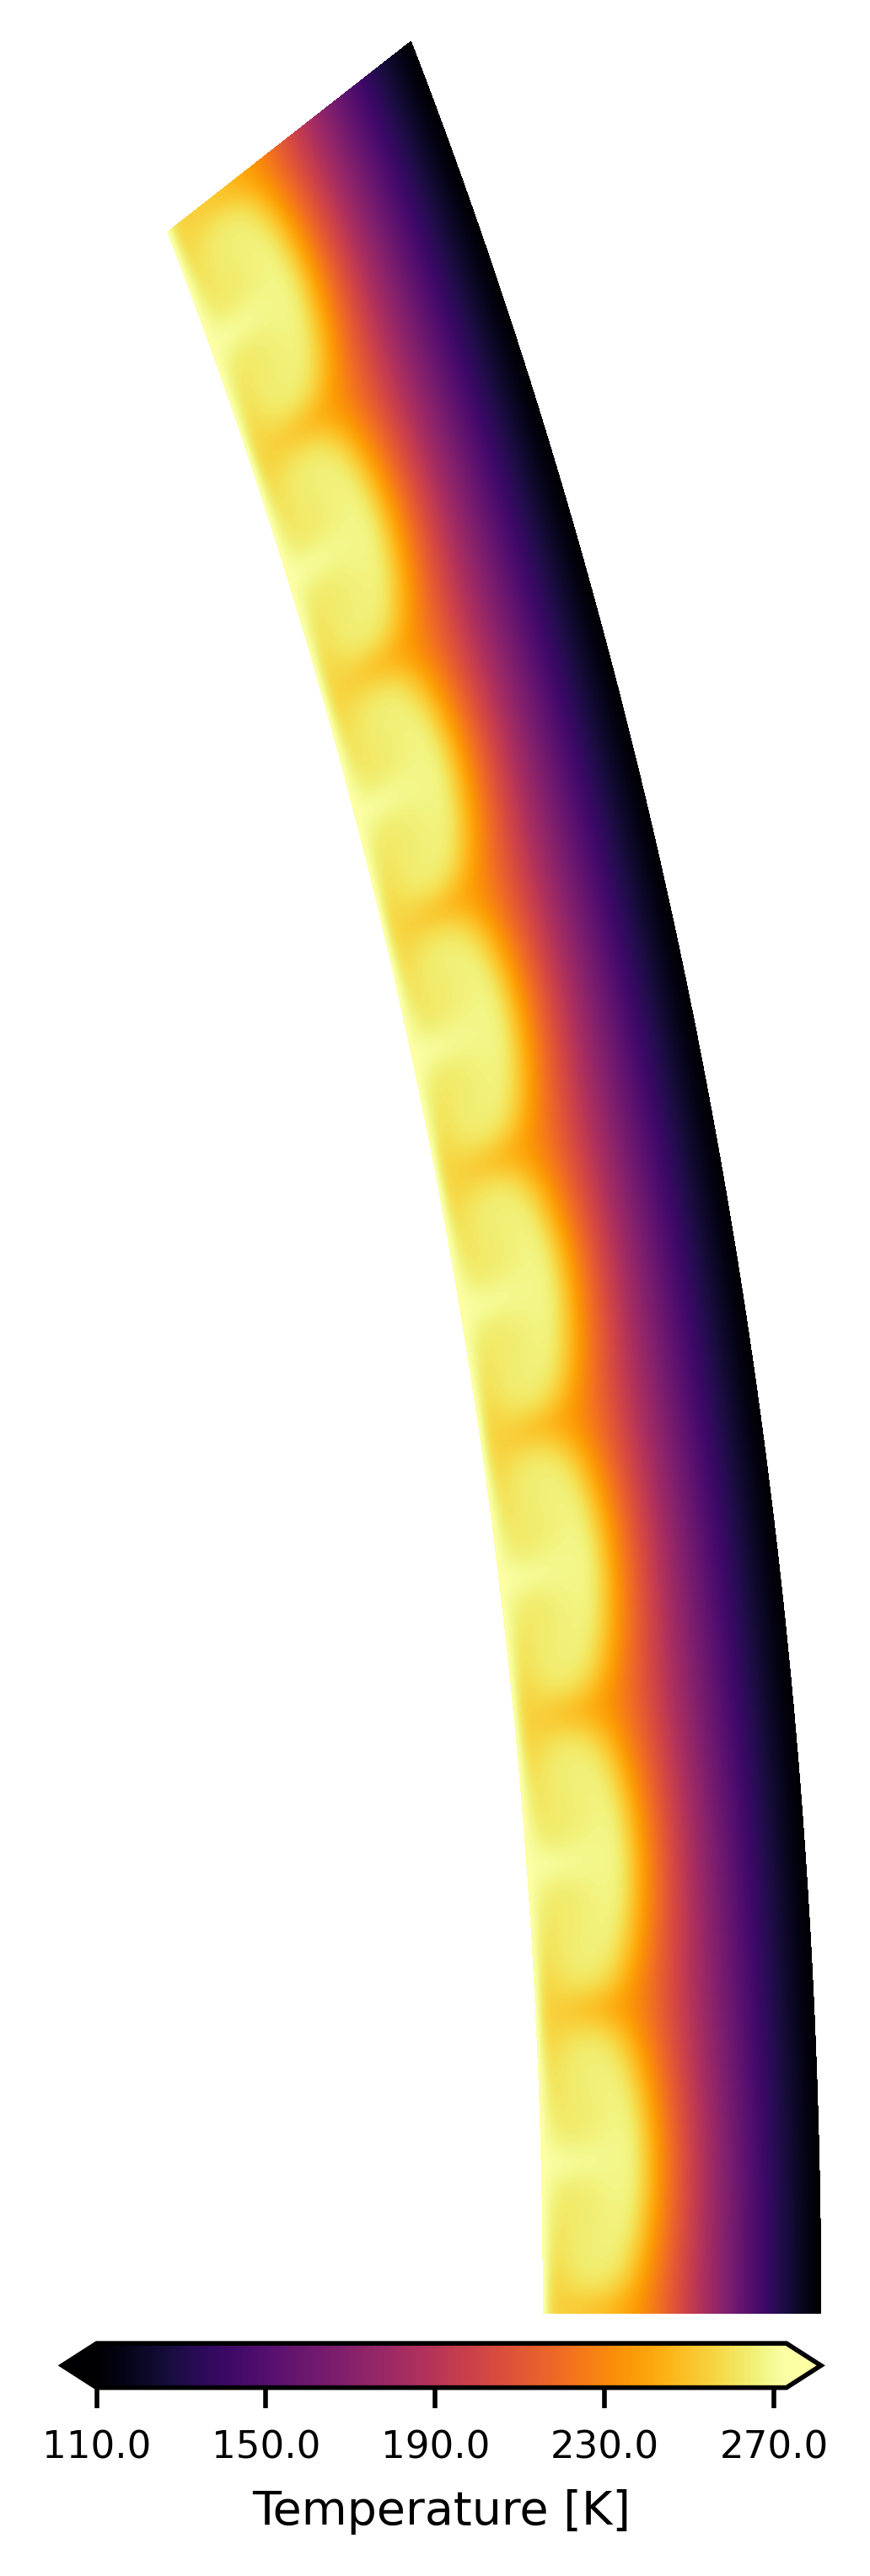

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
cb = gu.mk_gaia_T_plot(o_1e4, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)
plt.show()

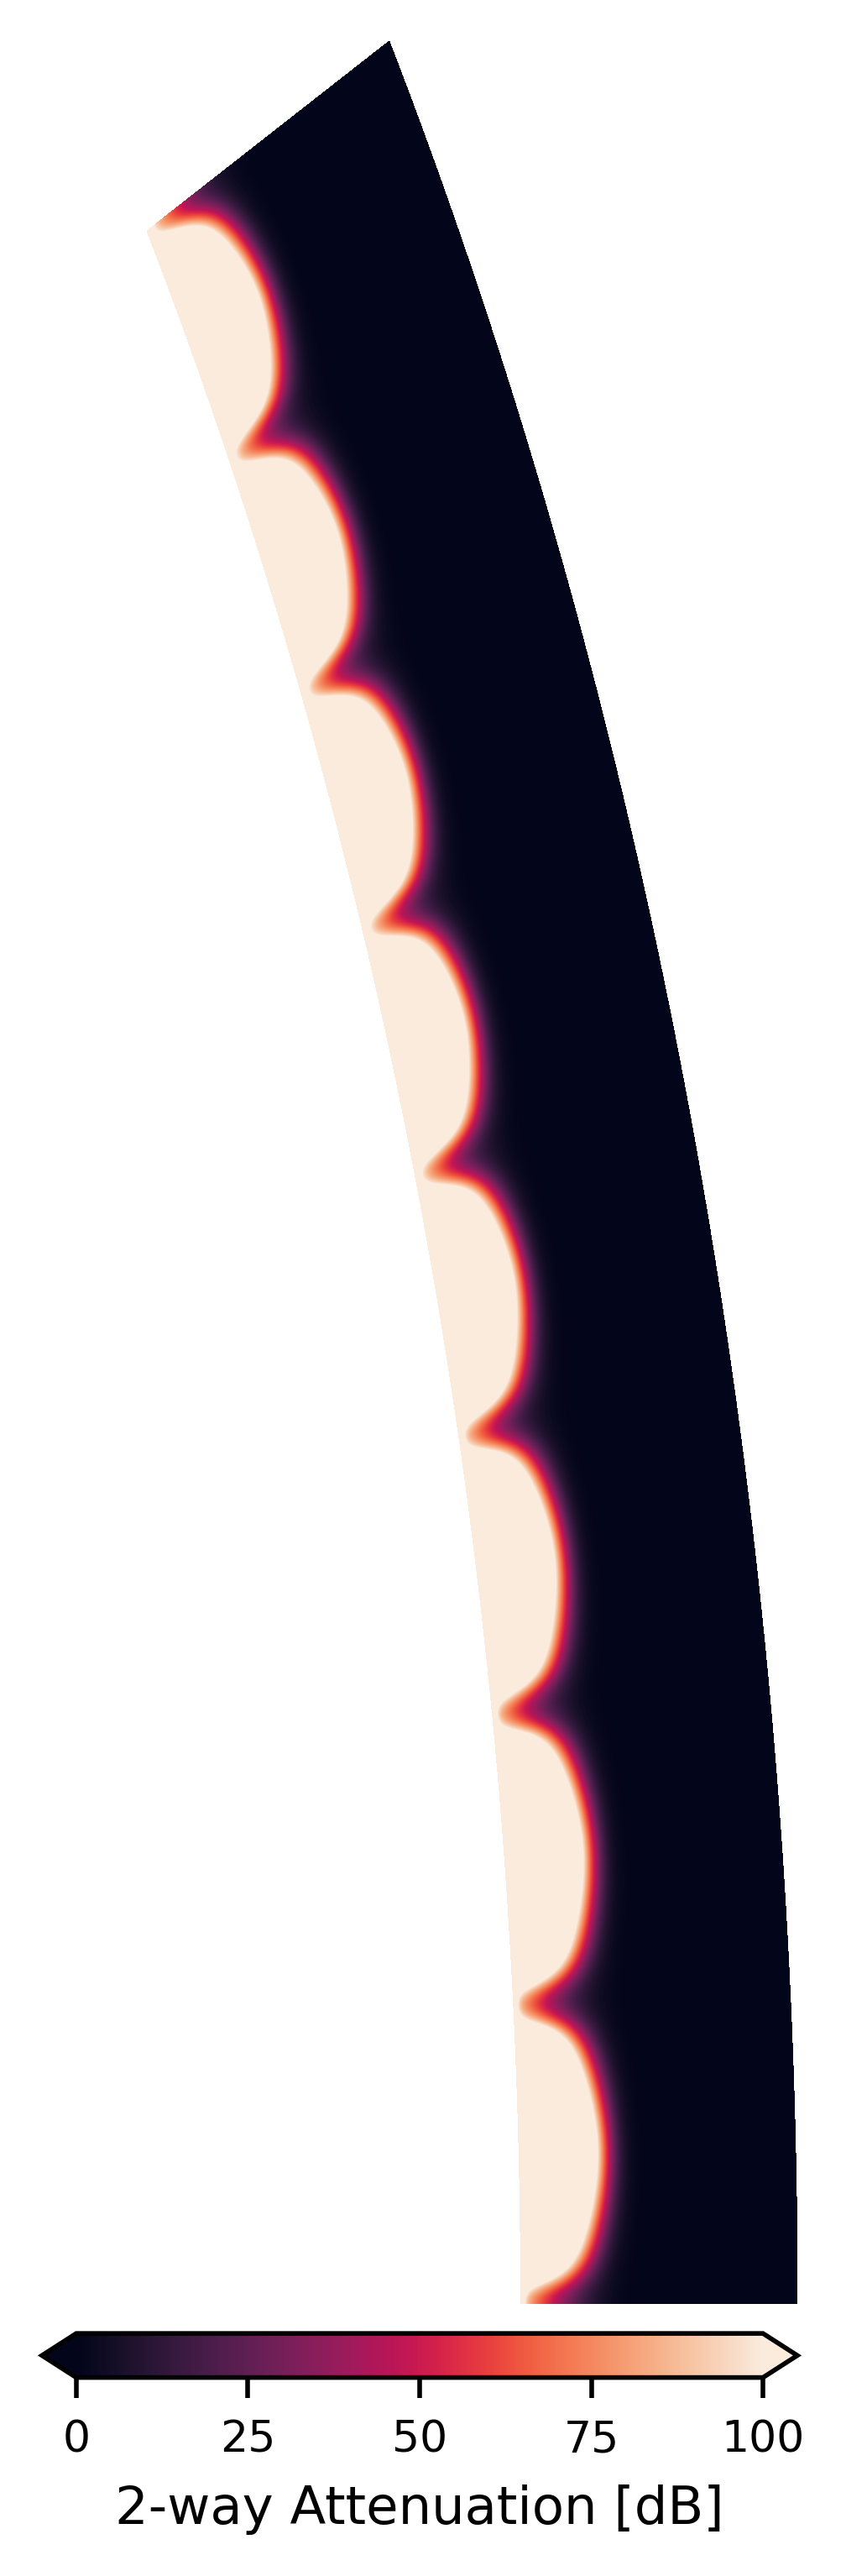

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
gu.mk_gaia_attenuation_plot(o_1e4, attenuation_1e4, '2-way Attenuation [dB]', 100, fig, ax, 9, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = 0, residual = False)
plt.show()